<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/nn_captum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install captum

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 2.9 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.3 MB 4.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.3 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.0 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
from captum.attr import IntegratedGradients, Saliency, DeepLift
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

In [ ]:
base_df = pd.read_excel(folder_path+'lista_categorias_testing.xlsx')
base_df.columns

Index(['Unnamed: 0', 0], dtype='object')

In [ ]:
columnas_list = list(base_df[0])

In [ ]:
folder_path = 'C://Users/PC}/Documents/2024_Q5/edusights_prediccion_sample/archivos/'
os.listdir(folder_path)

['df_Ingresantes_uvir_2220al2410_deserción.pkl',
 'Estudiantes_202420_al1107.xlsx',
 'lista_categorias_testing.xlsx',
 'X_train_tensor.pt',
 'X_train_tensor_sample.pt',
 'y_train_tensor.pt']

In [ ]:
sample_df = pd.read_excel(folder_path+'Estudiantes_202420_al1107.xlsx')
sample_df.columns

Index(['Tiempo_espera', 'DNI', 'NOMBRE', 'TIPO_INGRESANTE', 'APROBO_RV',
       'APROBO_RM', 'Puntaje_Admisión', 'Edad', 'Rango_Edad', 'Sexo',
       'Dep_viv_act', 'Migrante', 'Estado Civil', 'Dependientes', 'Vives_con',
       'Tipo_de_cole', 'Max_Grado', 'Estudio_Madre', 'Estudio_Padre',
       'Tipo_lugar_origen', 'Ocupación', 'Tipo_trabajo', 'Ingre_estudiante',
       'Ingre_familia', 'Dispo_Internet'],
      dtype='object')

In [ ]:
dni_list = list(sample_df.DNI)

In [ ]:
folder_path = 'C://Users/PC}/Documents/2024_Q5/edusights_prediccion_sample/modelos/'
os.listdir(folder_path)

['edusights_20240702_model_CON_50.pth',
 'edusights_20240702_state_dict_CON_50.pth']

In [ ]:
class SimplePlusNN2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimplePlusNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 32)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(DROPOUTX)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
input_size = 149
num_classes = 2
DROPOUTX = 0.1
model = SimplePlusNN2(input_size, num_classes)

In [ ]:
model_path = 'edusights_20240702_model_CON_50.pth'
model_dict_path = 'edusights_20240702_state_dict_CON_50.pth'

In [ ]:
model.load_state_dict(torch.load(folder_path + model_dict_path))
model.eval()

SimplePlusNN2(
  (fc1): Linear(in_features=149, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (sigmoid): Sigmoid()
)

In [ ]:
folder_path = 'C://Users/PC}/Documents/2024_Q5/edusights_prediccion_sample/archivos/'
sample_file = 'Estudiantes_202420_al1107.xlsx'
X_test_file = 'X_train_tensor_sample.pt'

In [ ]:
X_sample_tensor = torch.load(folder_path + X_test_file)
X_sample_tensor.shape

torch.Size([140, 149])

In [ ]:
ig = IntegratedGradients(model)

In [ ]:
target_class = 0  # Specify the target class if needed
attributions, delta = ig.attribute(input_tensor, target=target_class, return_convergence_delta=True)

In [ ]:
# Convert attributions to DataFrame
REDUC_COLS, REDUC_ROWS = 0.95, 0.80
attributions_array = attributions.squeeze().cpu().detach().numpy()
df = pd.DataFrame(attributions_array)
column_mean_abs = df.abs().mean(axis=0)
row_mean_abs = df.abs().mean(axis=1)
threshold_col = column_mean_abs.quantile(REDUC_COLS)
threshold_row = row_mean_abs.quantile(REDUC_ROWS)
cols_to_keep = column_mean_abs[column_mean_abs > threshold_col].index
rows_to_keep = row_mean_abs[row_mean_abs > threshold_row].index
print(cols_to_keep)
print(rows_to_keep)
reduced_df = df.loc[rows_to_keep, cols_to_keep]

Index([3, 6, 58, 76, 79, 138, 147, 148], dtype='int64')
Index([  0,   4,  10,  14,  17,  18,  19,  25,  29,  33,  35,  39,  48,  53,
        55,  61,  71,  74,  75,  78,  80,  82,  86,  87, 102, 119, 124, 128],
      dtype='int64')


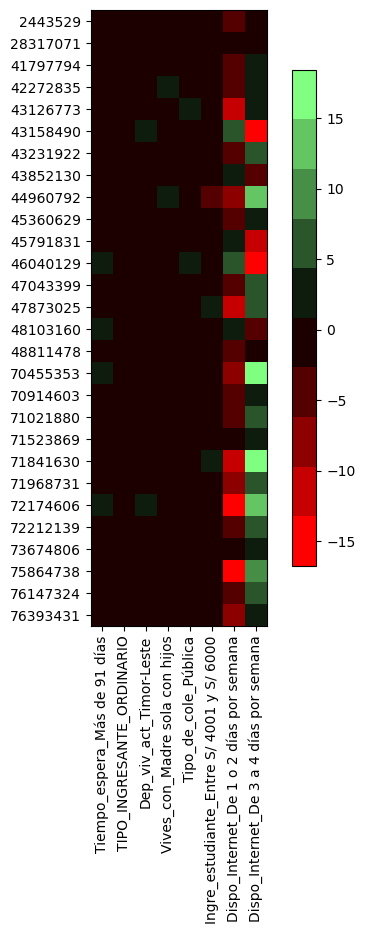

In [ ]:
fig = plt.figure(figsize=(8,8))
colors = [(1, 0, 0), (0, 0, 0), (0.5, 1, 0.5)]  # Red, Black, Light Green
n_bins = 10  # Discretizes the interpolation into bins
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
xtick_labels = [columnas_list[pos] for pos in cols_to_keep]
ytick_labels = [dni_list[pos] for pos in rows_to_keep]
plt.imshow(reduced_df.values, cmap=cm)
plt.xticks(np.arange(len(xtick_labels)), labels=xtick_labels, rotation=90)
plt.yticks(np.arange(len(ytick_labels)), labels=ytick_labels)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [ ]:
fig.savefig('D://')